In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [12]:
df = pd.read_csv('dataset_NBA.csv')
df

,Unnamed: 0,Team,season,win_match,overall_pick,position
0,0,Atlanta Hawks,2000,25.0,22.0,Guard
1,1,Atlanta Hawks,2001,33.0,20.0,Forward
2,2,Atlanta Hawks,2002,35.0,10.0,Guard
3,3,Atlanta Hawks,2002,35.0,20.0,Forward-Guard
4,4,Atlanta Hawks,2002,35.0,27.0,Forward
...,...,...,...,...,...,...
1264,1264,Washington Wizards,2022,35.0,9.0,Forward
1265,1265,Washington Wizards,2023,NaN,37.0,Guard
1266,1266,Washington Wizards,2024,NaN,15.0,Forward
1267,1267,Washington Wizards,2025,NaN,10.0,Guard


In [13]:
df = df.groupby(['season', 'Team', 'win_match'], dropna=False)['overall_pick'].min().reset_index(name='total_pick')


In [14]:
# list = 'Phoenix Suns'
list = input("Ville suivi du nom de l'équipe : ")
df = df[df['Team'].isin([list])]
df

,season,Team,win_match,total_pick
22,2000,Sacramento Kings,55.0,11.0
52,2001,Sacramento Kings,61.0,7.0
83,2002,Sacramento Kings,59.0,45.0
113,2003,Sacramento Kings,55.0,16.0
145,2004,Sacramento Kings,50.0,25.0
175,2005,Sacramento Kings,44.0,28.0
206,2006,Sacramento Kings,33.0,61.0
236,2007,Sacramento Kings,38.0,26.0
268,2008,Sacramento Kings,17.0,23.0
300,2009,Sacramento Kings,25.0,19.0


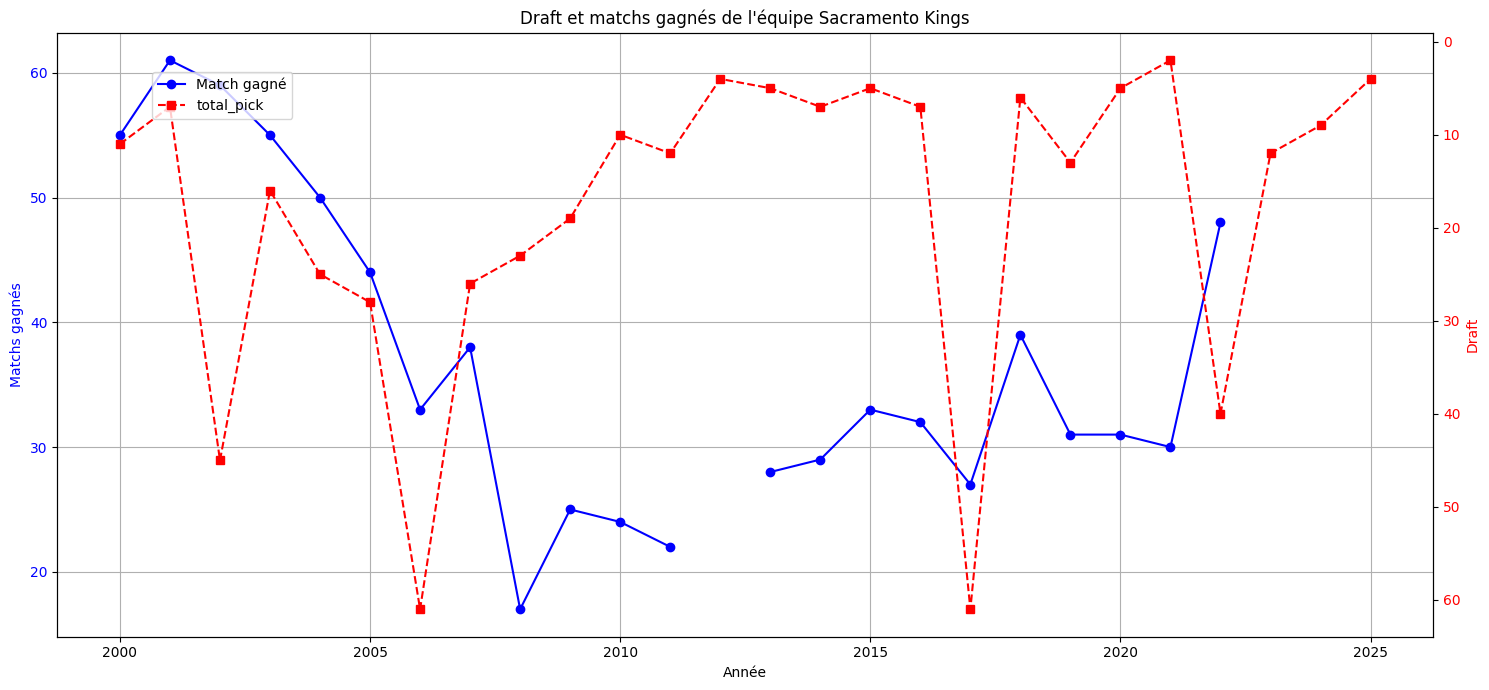

In [15]:
# Créer la figure et les axes
fig, ax1 = plt.subplots(figsize=(15, 7))

# Tracer les ventes avec l'axe y principal
ax1.plot(df['season'], df['win_match'], marker='o', linestyle='-', color='b', label='Match gagné')
ax1.set_xlabel('Année')
ax1.set_ylabel('Matchs gagnés', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Créer un deuxième axe y qui partage le même axe x
ax2 = ax1.twinx()
ax2.plot(df['season'], df['total_pick'], marker='s', linestyle='--', color='r', label='total_pick')
ax2.set_ylabel('Draft', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.invert_yaxis()
# Ajouter des titres et des labels
plt.title("Draft et matchs gagnés de l'équipe " + list)


# Afficher une légende
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
# Afficher le graphique
plt.show()

In [16]:
df.to_csv(list+'.csv')